In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'KA'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

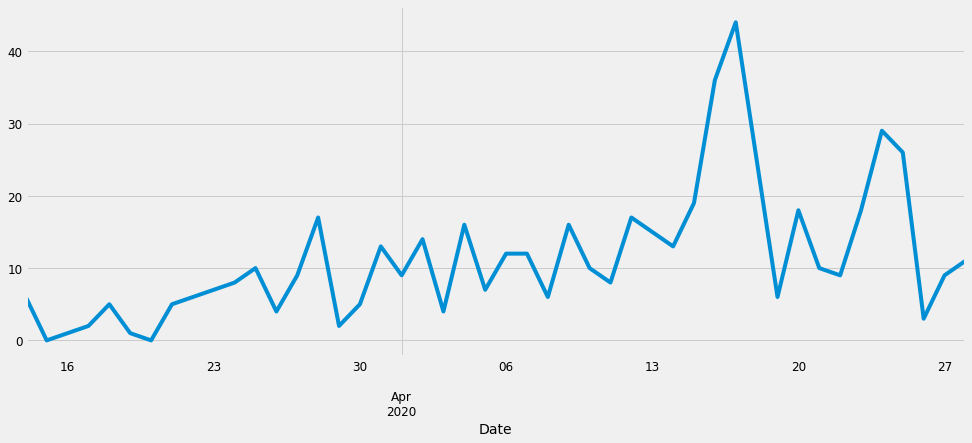

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

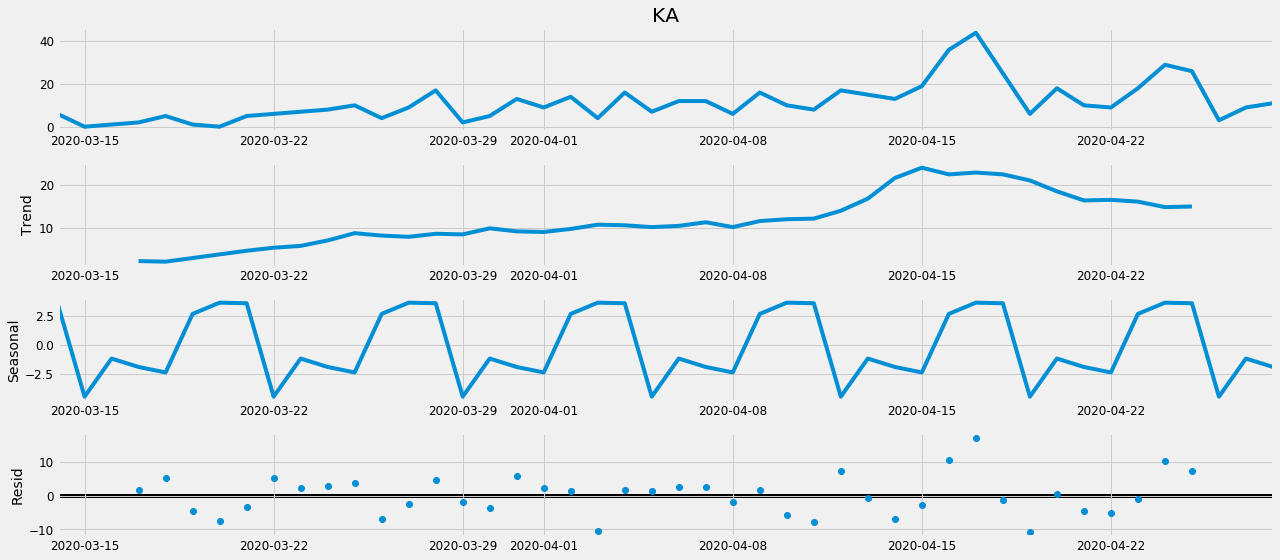

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:371.6151387835766


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1171.6759720941018
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:257.87766463334714
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:171.61434602917575
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:266.6083680516599
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1433.9477364423449
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:178.9626270350782
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:171.38708461356487
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:333.8842024487086


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1381.6833334100224
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:244.76646907077787
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:156.3515592220567
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:259.0788374456017


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1378.329139510941
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:174.06516978570693
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:161.00511086153202
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:316.01512348167887


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1295.5043046745973
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:248.12387527202262
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:158.27507839992012
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:247.70184509884018


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1326.470677218274
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:165.85441365692617
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:160.92434008627586
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:306.79592259235943


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1433.5209893147473
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:239.02577146753117
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:152.0098774354764
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:245.86535167303376


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1463.68696409294
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:166.2815716611467
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:154.01547956301658
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:320.85734426755135


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1339.911515440761
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:250.48368321476352
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:163.24534131386963
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:246.13743688393313


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1338.1011832801144
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:163.94150719090808
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:165.67999774425095
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:314.8662297268145


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1197.141659529499
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:245.00970732981392
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:158.02782586704254
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:247.76609812585485


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1193.543222056871
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:165.85530817699328
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:160.9396630744508
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:316.76395942158257


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1594.1462866071824
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:248.0897687827624
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:159.20972312000328
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:242.08638056335818


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1624.540231969917
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:159.93233249712327
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:161.8536219468788
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:304.62997795887304


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1300.4896388546842
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:238.75741346376546
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:151.8700006657042
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:237.702289228663
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1397.8085628605154
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:159.42365543239612
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:153.9235526111163


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4641      0.415      1.117      0.264      -0.350       1.278
ma.L1         -1.0000   3143.114     -0.000      1.000   -6161.390    6159.390
ma.S.L12      -1.0000   9676.903     -0.000      1.000    -1.9e+04     1.9e+04
sigma2        73.2022   7.76e+05   9.43e-05      1.000   -1.52e+06    1.52e+06


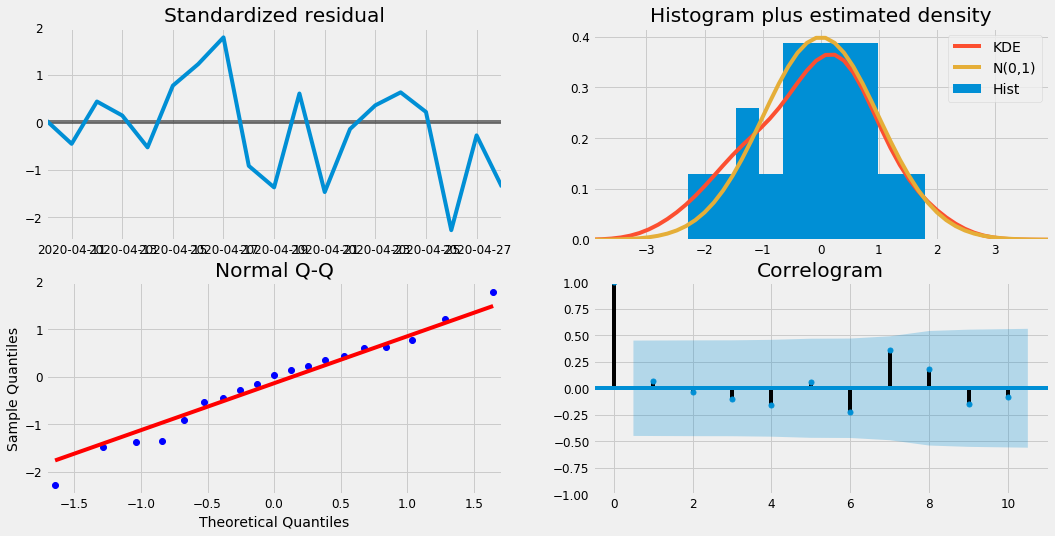

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

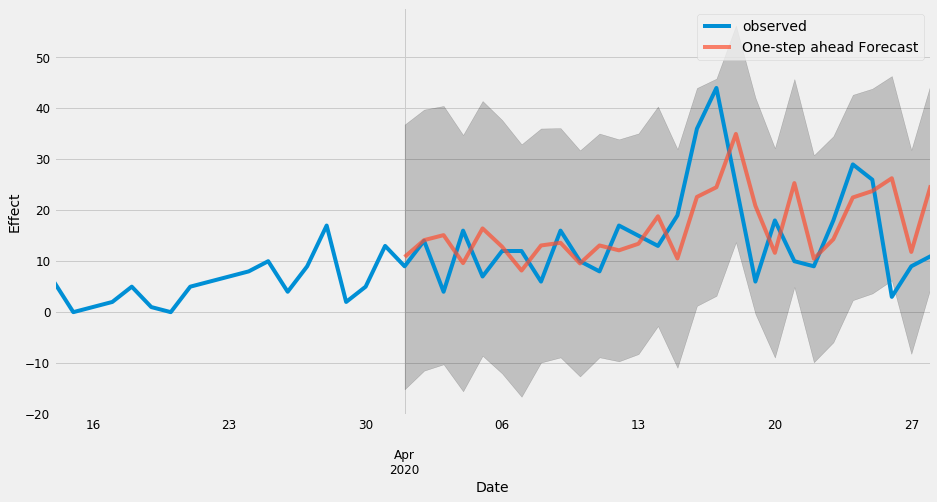

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 87.38


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 9.35


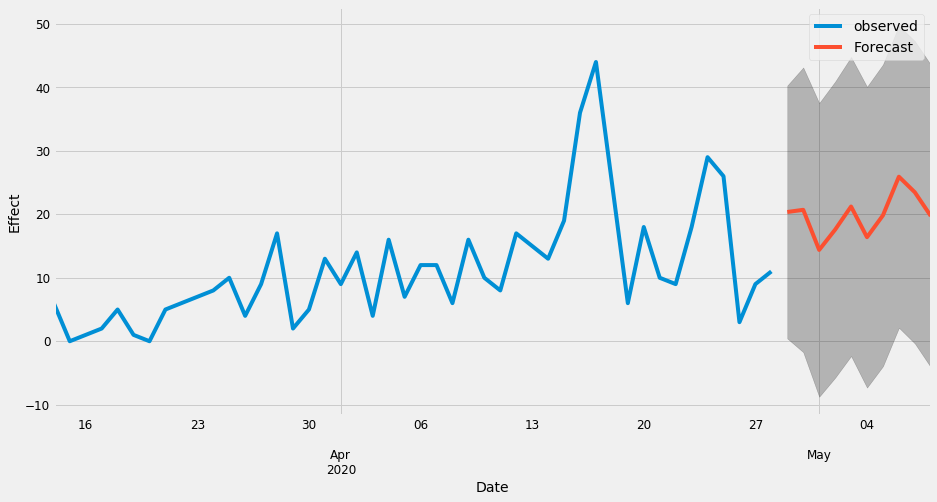

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,29,7
2020-04-25,26,6
2020-04-26,3,24
2020-04-27,9,11
2020-04-28,11,14


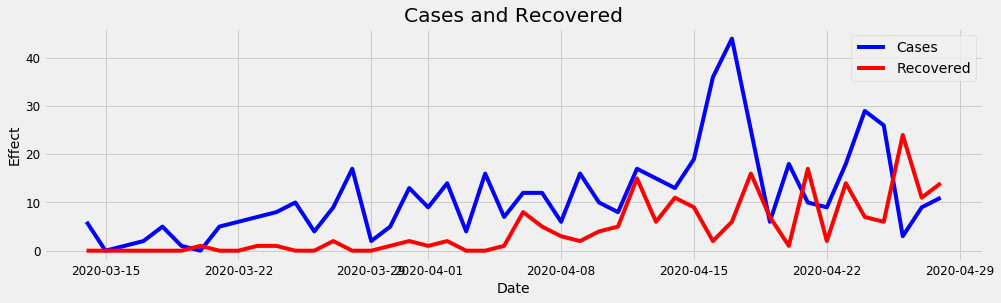

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

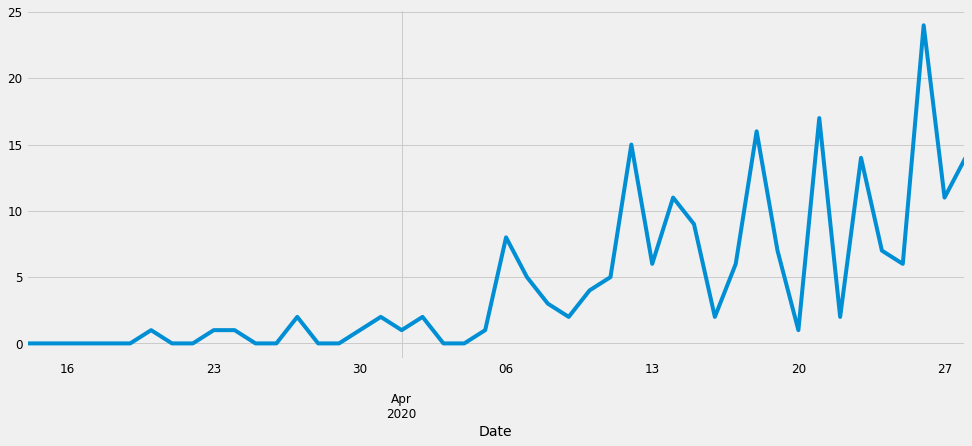

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

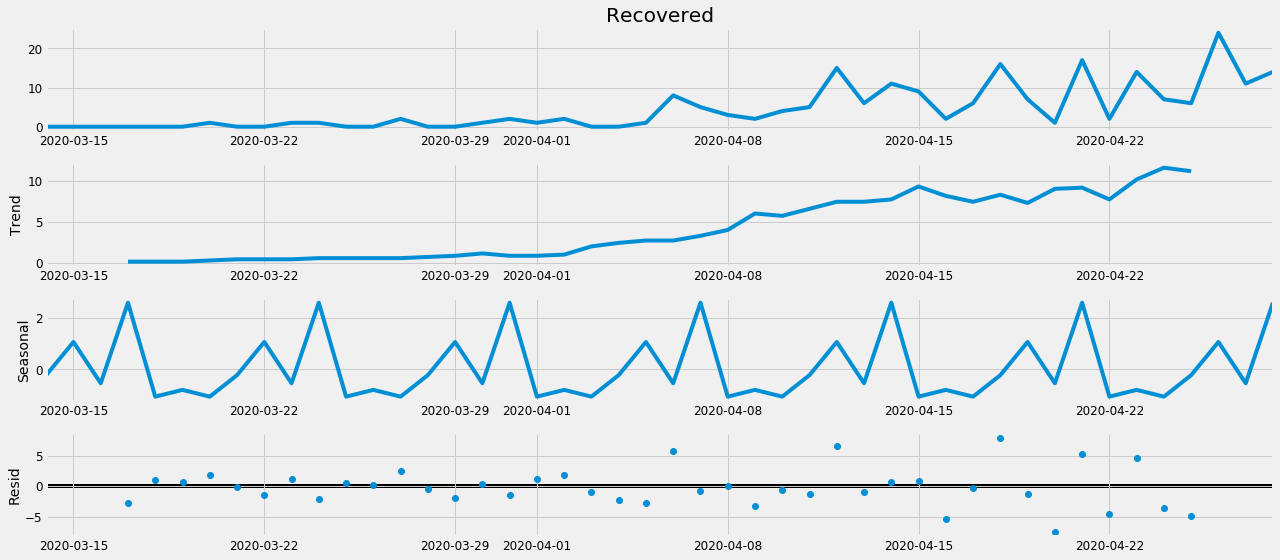

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:309.3381933659294


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1444.0133941628876
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:216.57310870975937
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:146.46571790203168
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:221.11680566363594


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1332.4281712343097
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:152.5262232136701
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:148.46569293375254
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:294.5664297546636


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1329.6258680684778
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:211.91099531141793
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:142.63841682431385
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:223.00645733163523


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1284.6725061863126
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:154.5009433895685
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:144.1367550922534
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:289.12725855807275


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1351.7506370588387
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:222.39954356568973
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:149.03771649023582
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:227.82270367544075


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1341.2271943792514
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:155.4166729627771
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:150.7469085419111
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:257.01726273544654


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1170.5438909785403
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:195.97784297427614
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:129.56303913850758
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:206.9545515061212


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1174.0817378284985
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:140.59386441038922
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:130.42444685041963
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:289.07207392892406


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:775.3112937313438
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:216.55009237770912
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:148.35924802623026
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:217.50569732977306


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:655.1027535722613
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:148.21877342524192
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:149.94016879538802
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:259.1979150111954


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1276.1806286265087
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:202.82776713605583
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:135.98063237354296
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:206.27346065728906


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1229.4844775653528
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:143.02775775244734
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:137.90219953889584
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:271.9147076113848
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1592.1822026002137
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:207.5333955488814


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:139.74562038767905
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:207.94745901284233


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1595.774942849227
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:139.79329403292888
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:140.79338086211337
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:255.30137683357245


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1228.303946991324
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:195.8135953332185
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:129.42883546773226
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:200.47549801384937


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1231.7254231279617
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:134.20572787594838
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:130.21781929061325


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3821      0.349     -1.096      0.273      -1.065       0.301
ma.L1         -0.7780      0.263     -2.960      0.003      -1.293      -0.263
ma.S.L12      -0.4893      0.486     -1.006      0.314      -1.443       0.464
sigma2        33.7281     15.076      2.237      0.025       4.181      63.276


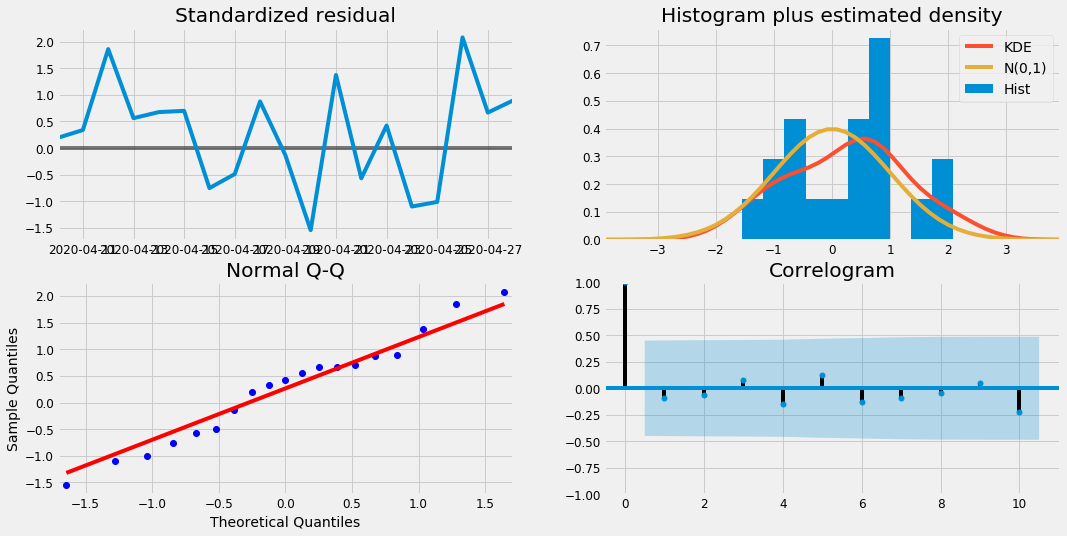

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

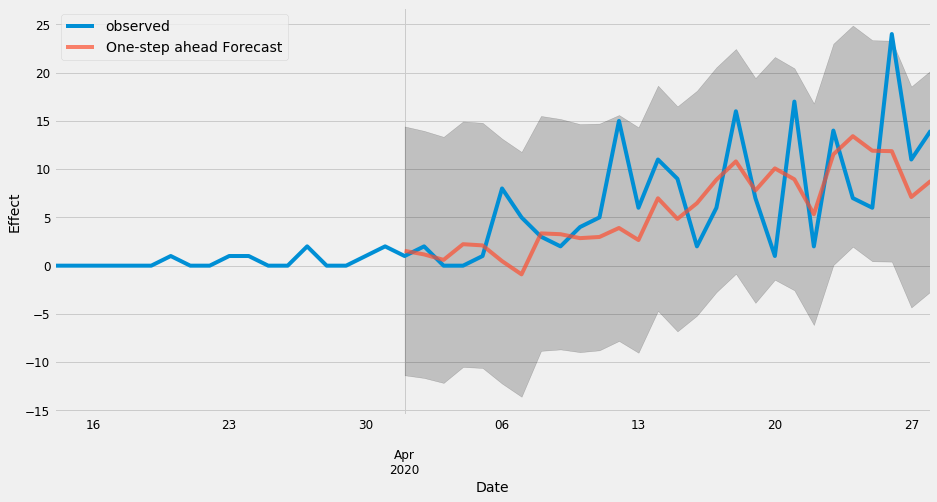

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 27.15


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 5.21


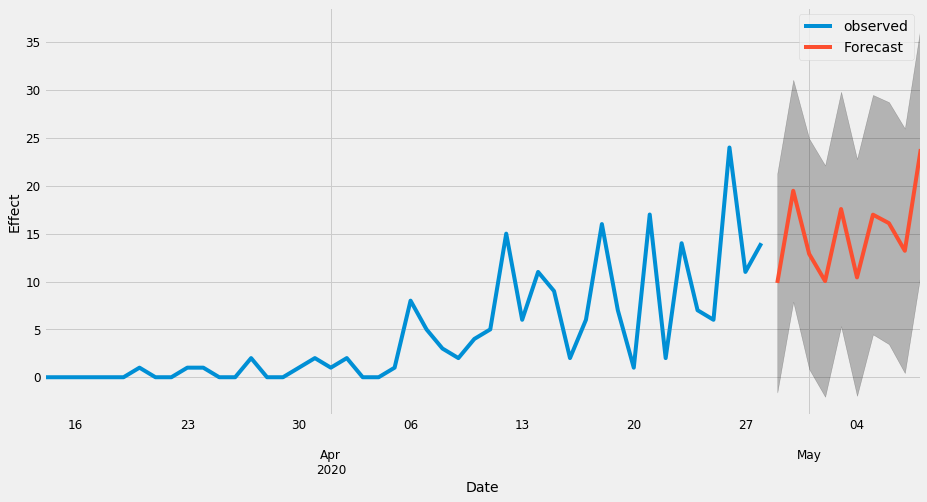

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

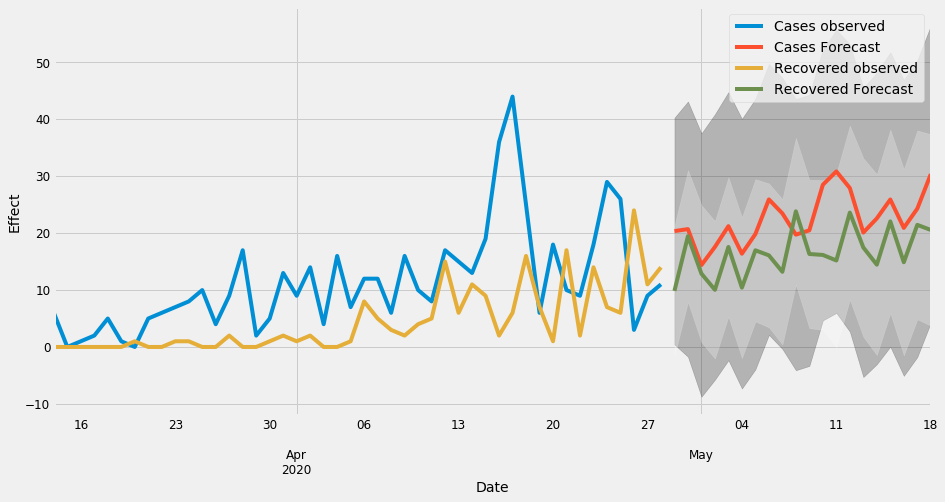

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

37

In [33]:
int(min(cases_result_date[0]))

14

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-01


In [36]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-13


In [38]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-01
